# 09 머신러닝 기초 (비지도 학습)

## 9.1 비지도학습

### 9.1.1 비지도학습 모델 종류

### 9.1.2 라이브러리 임포트

In [1]:
import numpy as np
import numpy.random as random
import pandas as pd
import scipy as sp

from pandas import Series, DataFrame

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%precision 3

'%.3f'

## 9.2 군집분석

### 9.2.1 k-means

### 9.2.2 k-means 군집 분석

In [2]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [3]:
X, _ = make_blobs(random_state=10)

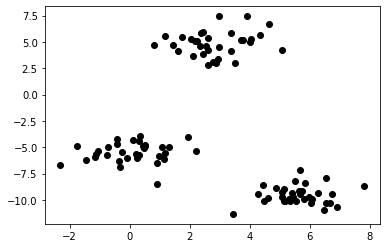

In [4]:
plt.scatter(X[:,0],X[:,1],color='black')

In [5]:
kmeans = KMeans(init='random', n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

In [6]:
merge_data = pd.concat([pd.DataFrame(X[:,0]), pd.DataFrame(X[:,1]), pd.DataFrame(y_pred)], axis=1)
merge_data.columns = ['feature1','feature2','cluster']

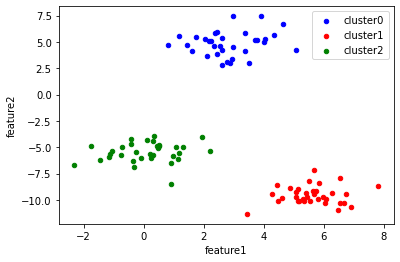

In [7]:
ax = None
colors = ['blue', 'red', 'green']
for i, data in merge_data.groupby('cluster'):
    ax = data.plot.scatter(x='feature1', y='feature2', color=colors[i], label=f'cluster{i}', ax=ax)

### 9.2.3 금융 마케팅 데이터를 이용한 군집분석

In [8]:
# import requests, zipfile
# import io

# zip_file_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip'
# r = requests.get(zip_file_url, stream=True) 
# z = zipfile.ZipFile(io.BytesIO(r.content)) 
# z.extractall()

In [9]:
bank = pd.read_csv('./data/bank-full.csv', sep=';')

In [10]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [11]:
print('데이터 형식 (X,y):{}'.format(bank.shape))
print('결측 값 수:{}'.format(bank.isnull().sum().sum()))

데이터 형식 (X,y):(45211, 17)
결측 값 수:0


In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
bank_sub = bank[['age', 'balance', 'campaign', 'previous']]
sc = StandardScaler()
sc.fit(bank_sub)
bank_sub_std = sc.transform(bank_sub)
bank_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       45211 non-null  int64
 1   balance   45211 non-null  int64
 2   campaign  45211 non-null  int64
 3   previous  45211 non-null  int64
dtypes: int64(4)
memory usage: 1.4 MB


In [29]:
kmeans = KMeans(init='random', n_clusters=6, random_state=0)
kmeans.fit(bank_sub_std)
labels = pd.Series(kmeans.labels_, name='cluster_number')
print(labels.value_counts(sort=False))

0    24509
1      221
2     2684
3     1380
4    14734
5     1683
Name: cluster_number, dtype: int64


Text(0, 0.5, 'count')

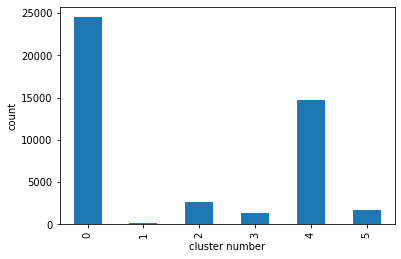

In [15]:
ax = labels.value_counts(sort=False).plot(kind='bar') 
ax.set_xlabel('cluster number') 
ax.set_ylabel('count')

### 9.2.4 엘보우법으로 군집 수 추정

Text(0, 0.5, 'Distortion')

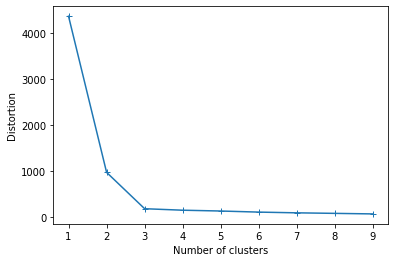

In [16]:
dist_list = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init='random', random_state=0)
    kmeans.fit(X)
    dist_list.append(kmeans.inertia_)
    
plt.plot(range(1,10), dist_list, marker='+')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')

Text(0, 0.5, 'Distortion')

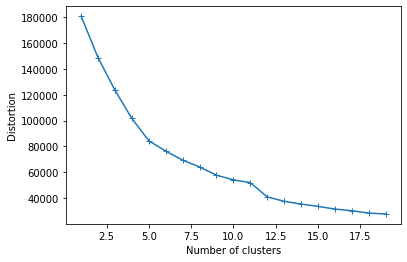

In [17]:
dist_list =[]
for i in range(1,20):
    kmeans= KMeans(n_clusters=i, init='random', random_state=0) 
    kmeans.fit(bank_sub_std)
    dist_list.append(kmeans.inertia_)

plt.plot(range(1,20), dist_list,marker='+') 
plt.xlabel('Number of clusters') 
plt.ylabel('Distortion')

### 9.2.5 군집분석 결과 해석

In [18]:
bank_with_cluster = pd.concat([bank, labels], axis=1)

In [19]:
bank_with_cluster.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,cluster_number
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,4
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,4
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,4
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0


In [20]:
bins = [15,20,25,30,35,40,45,50,55,60,65,100]
qcut_age = pd.cut(bank_with_cluster.age, bins, right=False)
df = pd.concat([bank_with_cluster.cluster_number, qcut_age], axis=1)

In [21]:
cross_cluster_age = df.groupby(['cluster_number', 'age']).size().unstack().fillna(0)
cross_cluster_age

age,"[15, 20)","[20, 25)","[25, 30)","[30, 35)","[35, 40)","[40, 45)","[45, 50)","[50, 55)","[55, 60)","[60, 65)","[65, 100)"
cluster_number,,,,,,,,,,,
0,45,711,4024,8492,7146,4091,0,0,0,0,0
1,0,3,10,37,25,26,27,30,38,11,14
2,0,14,152,497,517,460,375,306,263,63,37
3,0,20,132,327,308,187,146,117,71,38,34
4,0,0,0,0,0,1155,4701,3885,3436,838,719
5,2,14,146,387,353,266,221,150,114,24,6


In [22]:
hist_age = pd.value_counts(qcut_age)
hist_age

[30, 35)     9740
[35, 40)     8349
[40, 45)     6185
[45, 50)     5470
[50, 55)     4488
[25, 30)     4464
[55, 60)     3922
[60, 65)      974
[65, 100)     810
[20, 25)      762
[15, 20)       47
Name: age, dtype: int64

<AxesSubplot:xlabel='age', ylabel='cluster_number'>

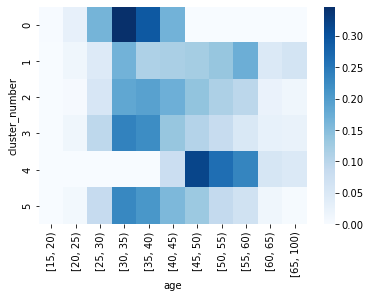

In [23]:
sns.heatmap(cross_cluster_age.apply(lambda x: x/x.sum(), axis=1), cmap='Blues')

In [24]:
cross_cluster_job = bank_with_cluster.groupby(['cluster_number', 'job']).size().unstack().fillna(0) 
cross_cluster_job

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
cluster_number,,,,,,,,,,,,
0,3097,5610,728,426,5130,57,852,2564,813,4459,698,75
1,15,12,19,7,91,24,11,9,3,21,6,3
2,219,459,91,70,788,111,130,189,48,460,99,20
3,196,244,42,22,332,53,41,112,52,250,31,5
4,1467,3040,543,675,2732,1984,479,1124,4,2084,439,163
5,177,367,64,40,385,35,66,156,18,323,30,22


<AxesSubplot:xlabel='job', ylabel='cluster_number'>

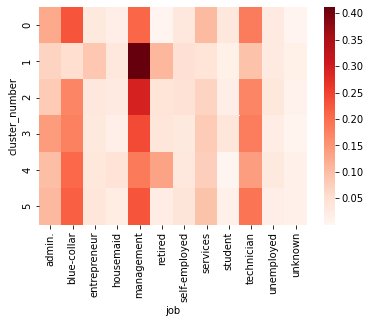

In [25]:
sns.heatmap(cross_cluster_job.apply(lambda x : x/x.sum(), axis=1),cmap='Reds')